In [122]:
import pandas as pd
import matplotlib as plt

0 secs - video data starts
34 secs - sensor data starts
46 secs - attention intervals start

In [104]:
sensor_data = pd.read_csv("data/sensor.csv", delimiter=";")
attention_interval = pd.read_csv("data/attention_intervals.csv")
attention = pd.read_csv("data/attention.csv")

In [105]:
#add timing indicator
sensor_data.insert(0, "index", range(0,len(sensor_data)))
sensor_data["seconds"] = sensor_data["index"] * 15 + 34

In [106]:
attention_interval += 46

In [107]:
attention["overall"] = attention["luuk"] + attention["jan"] + attention["carlos"] + attention["mayank"]

In [108]:
attention["seconds"] = attention["seconds"].astype("int")

In [109]:
new = pd.merge(attention, sensor_data, on="seconds", how="left")

In [110]:
luuk = attention_interval.iloc[:,:1]
jan = attention_interval.iloc[:,1:2]
mayank = attention_interval.iloc[:,2:3]
carlos = attention_interval.iloc[:,3:4]

In [111]:
luuk.dropna(inplace=True)
jan.dropna(inplace=True)
carlos.dropna(inplace=True)

In [112]:
luuk["luuk_indicator"] = 1
jan["jan_indicator"] = 1
mayank["mayank_indicator"] = 1
carlos["carlos_indicator"] = 1

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/2238878028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["mayank_indicator"] = 1


In [113]:
luuk.rename(columns={"Luuk": "seconds"}, inplace=True)
jan.rename(columns={"Jan": "seconds"}, inplace=True)
mayank.rename(columns={"Mayank": "seconds"}, inplace=True)
carlos.rename(columns={"Carlos": "seconds"}, inplace=True)

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/3929840990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank.rename(columns={"Mayank": "seconds"}, inplace=True)


In [114]:
luuk["seconds"] = luuk["seconds"].astype("int")
jan["seconds"] = jan["seconds"].astype("int")
mayank["seconds"] = mayank["seconds"].astype("int")
carlos["seconds"] = carlos["seconds"].astype("int")

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_71962/1193655532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["seconds"] = mayank["seconds"].astype("int")


In [115]:
new = pd.merge(new, luuk, on="seconds", how="left")
new = pd.merge(new, jan, on="seconds", how="left")
new = pd.merge(new, mayank, on="seconds", how="left")
new = pd.merge(new, carlos, on="seconds", how="left")

In [120]:
new["luuk_indicator"] = new["luuk_indicator"].fillna(0)
new["jan_indicator"] = new["jan_indicator"].fillna(0)
new["mayank_indicator"] = new["mayank_indicator"].fillna(0)
new["carlos_indicator"] = new["carlos_indicator"].fillna(0)

<AxesSubplot: xlabel='seconds'>

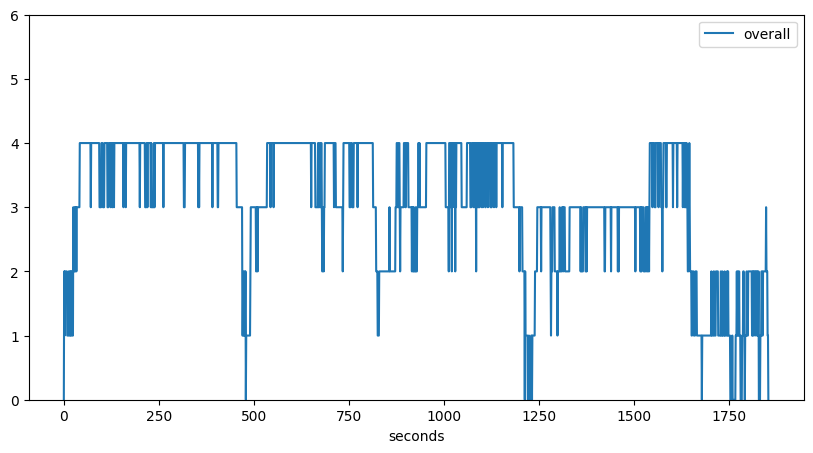

In [138]:
new.plot(x="seconds",y="overall", ylim=(0,6), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

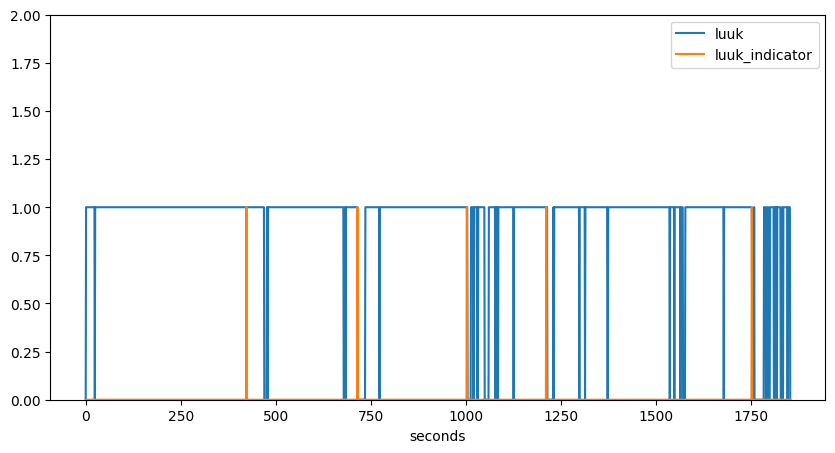

In [141]:
new.plot(x="seconds",y=["luuk", "luuk_indicator"], ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

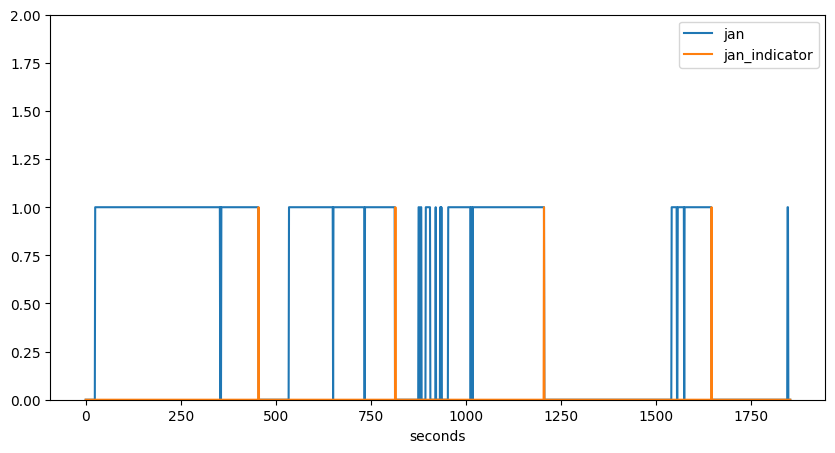

In [144]:
new.plot(x="seconds",y=["jan", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

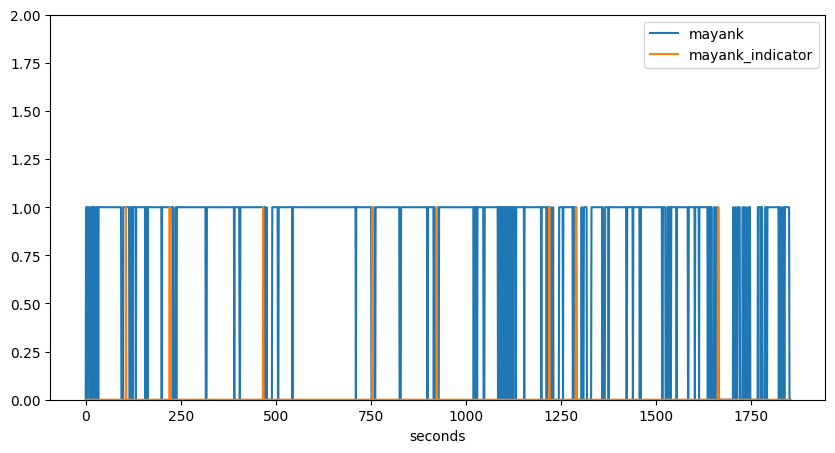

In [145]:
new.plot(x="seconds",y=["mayank", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5))

<AxesSubplot: xlabel='seconds'>

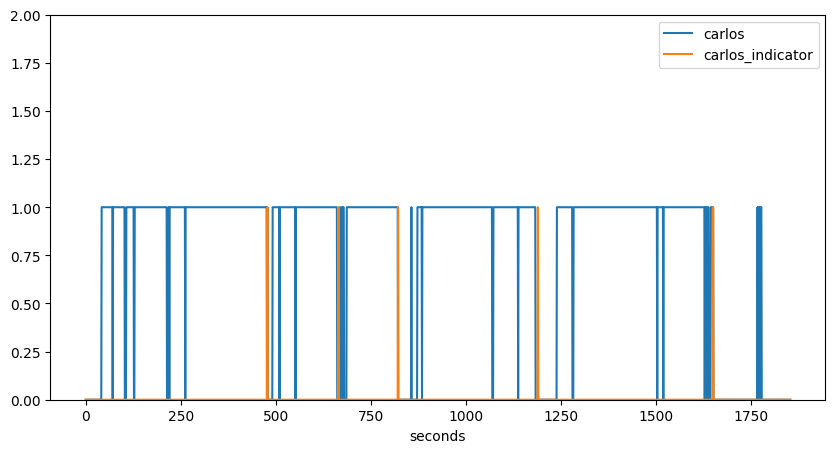

In [146]:
new.plot(x="seconds",y=["carlos", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5))